# Урок 10. Работа с признаками
Вам предстоит провести эксперименты с моделью машинного обучения и изучить процесс кросс-валидации и подбора гиперпараметров.

Ваша задача состоит в следующем:

1. Загрузите набор данных, подходящий для задачи классификации или регрессии. Вы можете использовать любой набор данных, предоставленный в библиотеке scikit-learn или другом доступном источнике данных.

2. Разделите данные на обучающую и тестовую выборки с помощью функции train_test_split из библиотеки scikit-learn.

3. Создайте модель машинного обучения, которую вы хотите использовать для предсказания на этом наборе данных. Например, можно использовать модель линейной регрессии или случайный лес для задачи регрессии, или модель логистической регрессии или случайный лес для задачи классификации.

4. Используйте метод кросс-валидации, чтобы оценить производительность модели на обучающей выборке. Например, можно использовать метод cross_val_score из библиотеки scikit-learn с использованием метрики оценки, такой как точность (accuracy) или среднеквадратичная ошибка (mean squared error).

5. Проведите подбор гиперпараметров модели с помощью метода GridSearchCV из библиотеки scikit-learn. Этот метод позволяет перебирать различные значения гиперпараметров и выбирать наилучшие значения на основе кросс-валидации.

6. Обучите модель с использованием оптимальных гиперпараметров на обучающей выборке и оцени ее производительность на тестовой выборке.

7. Проведите анализ результатов и сделай выводы о процессе кросс-валидации и подборе гиперпараметров в задачах машинного обучения.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.copy_on_write = True

df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
df = df.drop('State', axis=1)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
l = LabelEncoder()
df['International plan'] = l.fit_transform(df['International plan'])
df['Voice mail plan'] = l.fit_transform(df['Voice mail plan'])
df['Churn'] = l.fit_transform(df['Churn'])

In [18]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int32  
 3   Voice mail plan         3333 non-null   int32  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

In [20]:
df.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
Account length,3333.000000,101.064806,39.822106,1.000000,74.000000,101.000000,127.000000,243.000000
Area code,3333.000000,437.182418,42.371290,408.000000,408.000000,415.000000,510.000000,510.000000
International plan,3333.000000,0.096910,0.295879,0.000000,0.000000,0.000000,0.000000,1.000000
Voice mail plan,3333.000000,0.276628,0.447398,0.000000,0.000000,0.000000,1.000000,1.000000
Number vmail messages,3333.000000,8.099010,13.688365,0.000000,0.000000,0.000000,20.000000,51.000000
Total day minutes,3333.000000,179.775098,54.467389,0.000000,143.700000,179.400000,216.400000,350.800000
Total day calls,3333.000000,100.435644,20.069084,0.000000,87.000000,101.000000,114.000000,165.000000
Total day charge,3333.000000,30.562307,9.259435,0.000000,24.430000,30.500000,36.790000,59.640000
Total eve minutes,3333.000000,200.980348,50.713844,0.000000,166.600000,201.400000,235.300000,363.700000
Total eve calls,3333.000000,100.114311,19.922625,0.000000,87.000000,100.000000,114.000000,170.000000


In [21]:
df.duplicated().sum()

0

Создаем матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [22]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

Проверяем баланс классов

In [23]:
df['Churn'].value_counts(sort = False)

0    2850
1     483
Name: Churn, dtype: int64

По целевому показателю выборка не сбалансированная - данных с меньшим классом (положительное значение Churn) в 5,9 раз меньше, чем с отрицательным значением Churn

Text(0.5, 1.0, 'Гистограмма распределения целевой переменной (Churn)')

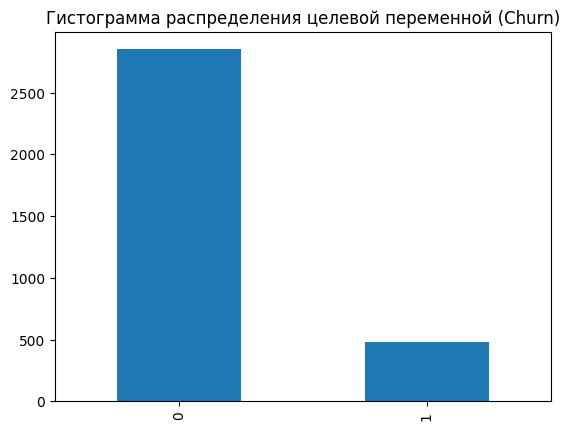

In [24]:
df['Churn'].value_counts().plot(kind='bar');
plt.title('Гистограмма распределения целевой переменной (Churn)')

Разбиваем данные на тренировочную и тестовую части, размер тестовой части — 30%, стратифицированное разбиение в связи с дисбалансом классов:

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn import metrics
import seaborn as sns

**Масштабируем признаки**

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---------
**Бэггинг (RandomForestClessifier)**

Строим BaseLine модель классификаци - RandomForestClassifier, с параметрами "из коробки"

In [29]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       855
           1       0.95      0.73      0.82       145

    accuracy                           0.95      1000
   macro avg       0.95      0.86      0.90      1000
weighted avg       0.95      0.95      0.95      1000



Имеем неплохие показатели - Recall 71% на минорном классе (какую долю реальных переходов к другому оператору удалось верно предсказать модели), показатель Precision (сколько из предсказанных переходов на тестовой выборке в реальности были переходами) 92%

In [30]:
confusion_mat = confusion_matrix(y_test, y_pred1)
print("Точность:", accuracy_score(y_test, y_pred1))
print("Точность:", precision_score(y_test, y_pred1, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred1, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred1, average = 'binary'))

Точность: 0.955
Точность: 0.9464285714285714
Полнота: 0.7310344827586207
F1-мера: 0.8249027237354086


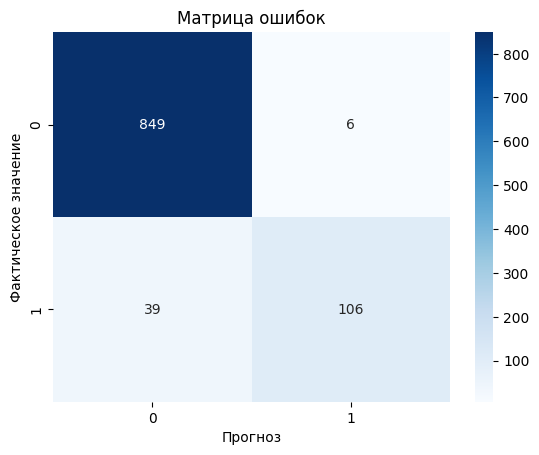

In [31]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

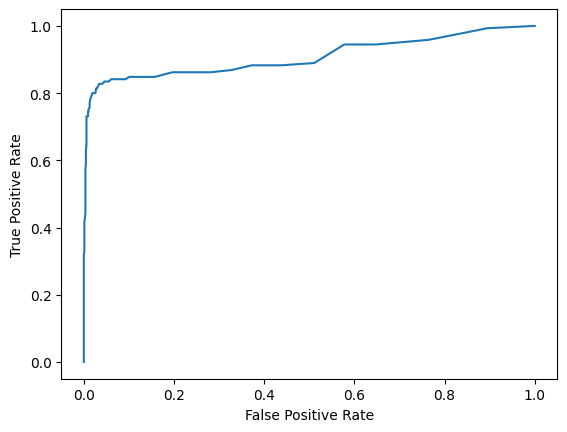

In [32]:
#Предсказываем вероятности
y_pred_proba1 = model1.predict_proba(X_test)[:, 1]
# Строим кривую ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba1)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
auc = metrics.roc_auc_score(y_test, y_pred_proba1)
print("AUC: %.3f" % auc)

AUC: 0.908


In [34]:
import plotly.graph_objs as go

trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

Показатель AUC (Area under Curve) - площади под кривой ROC - интерпретирует вероятность, с которой модель верно определит две точки (объекта), расположенные в разных классах, которые поданы ей на вход для анализа. В нашем случае это вероятность 90,5%. Показатель 50% (площадь под синей пунктирной кривой - вариант случайного выбора, рандомного угадывания).

**Визуализируем важность признаков для предсказания целевого признака Churn:**

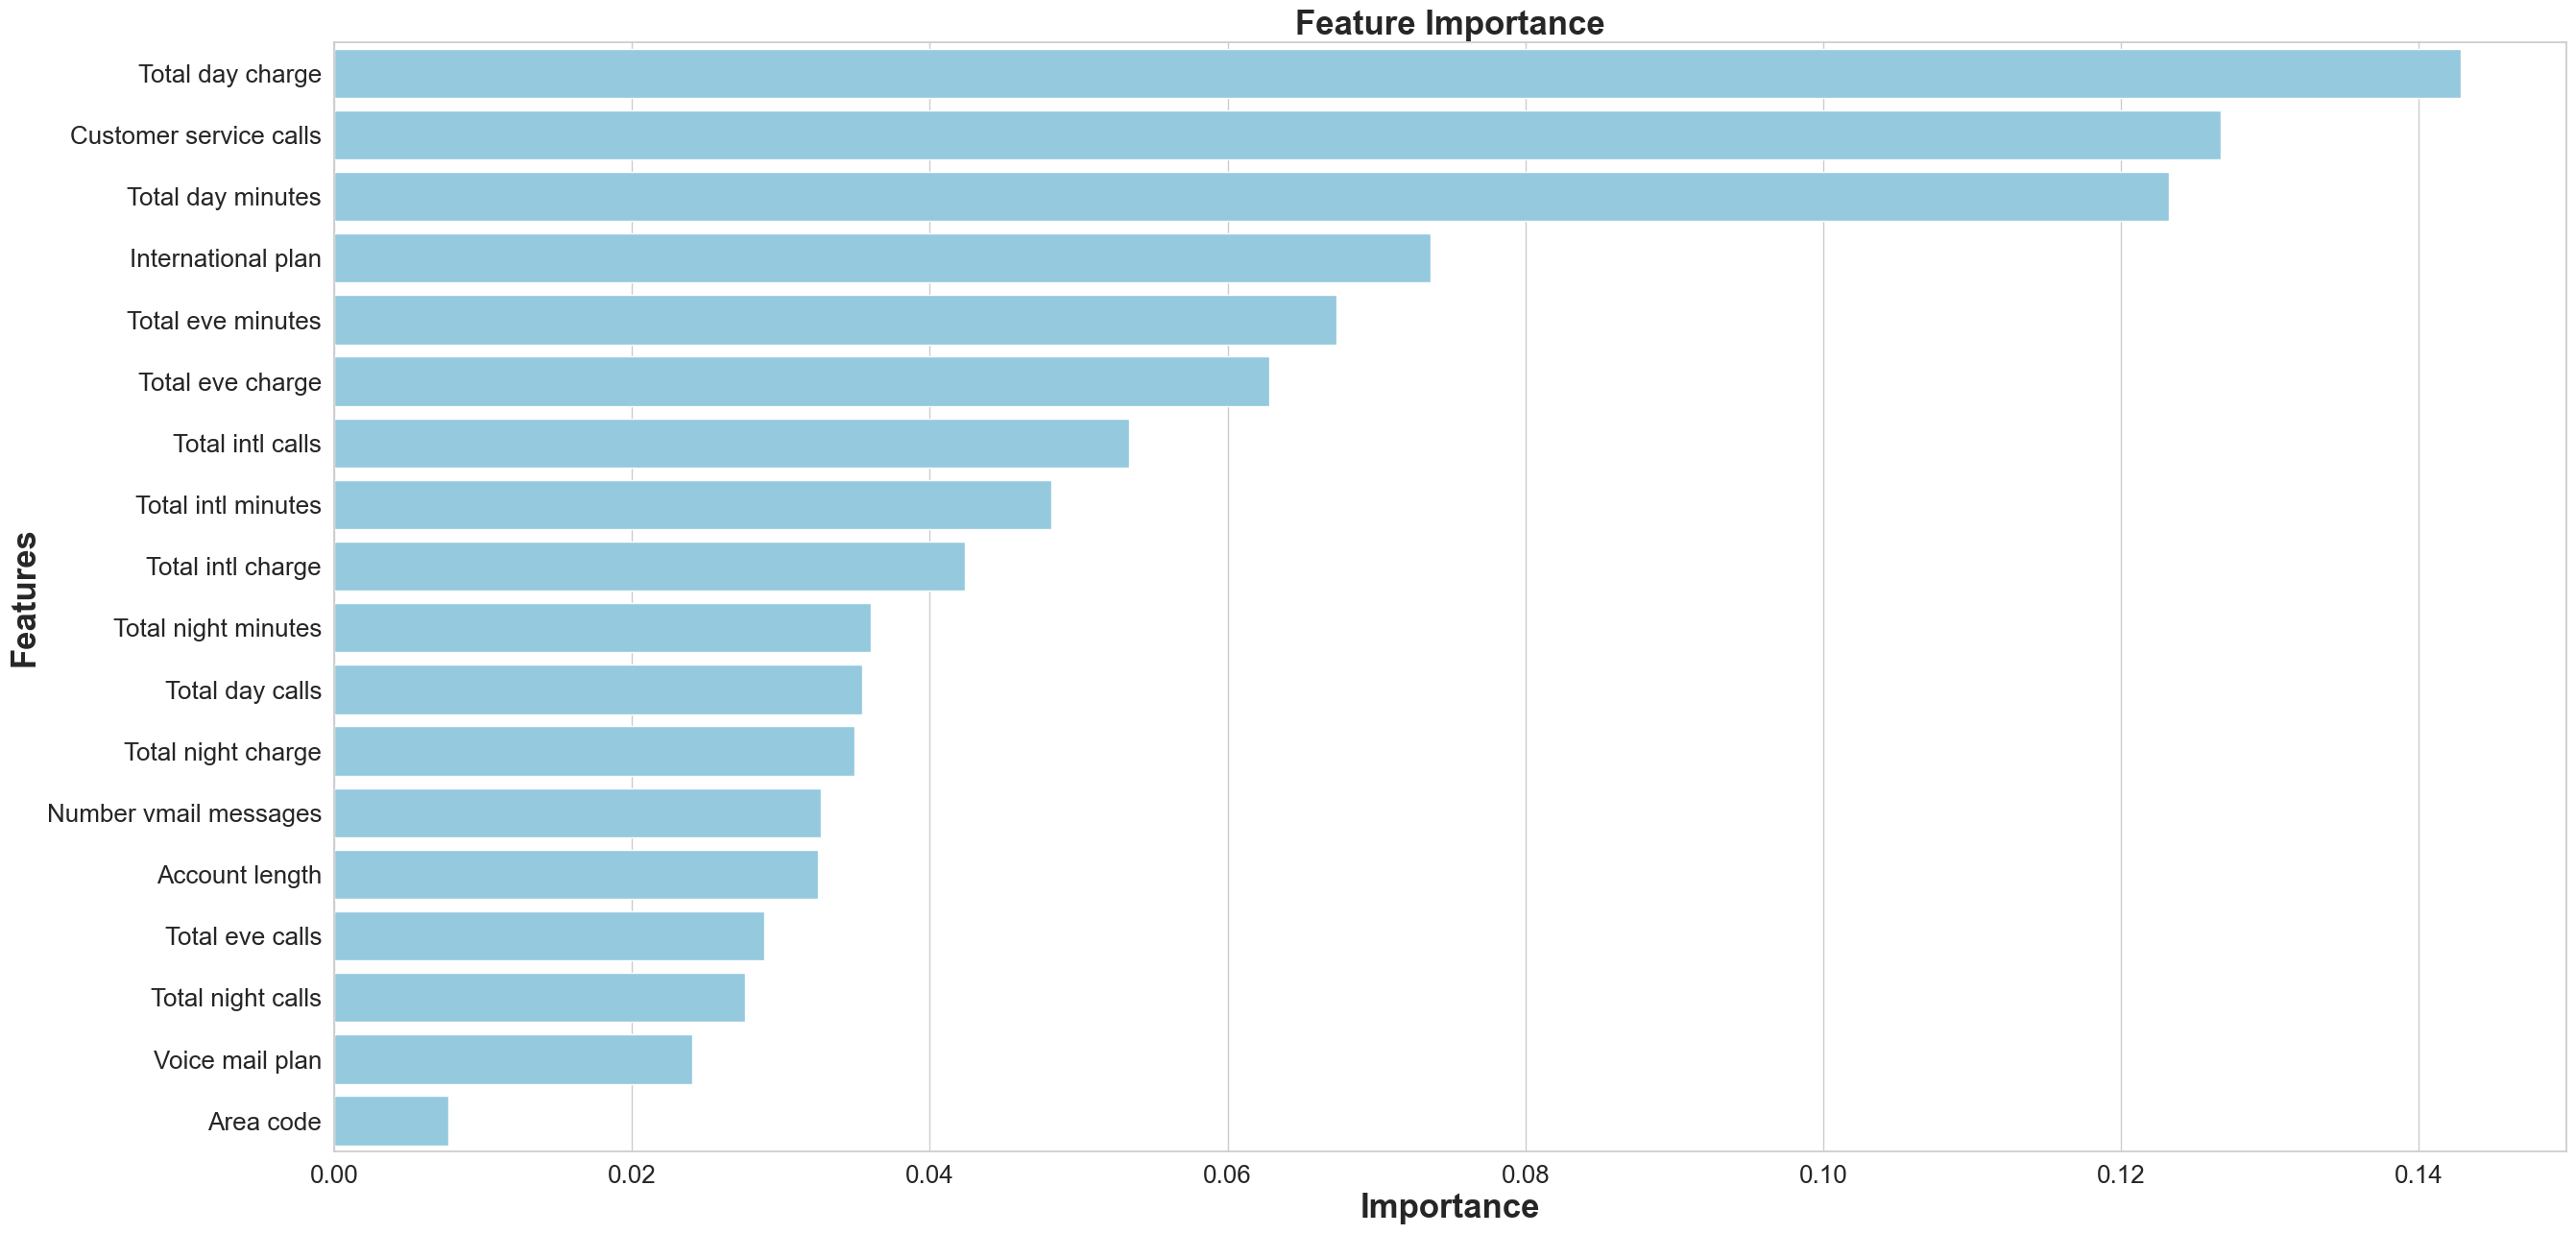

None

,Features,Gini-Importance
0,Total day charge,0.142800
1,Customer service calls,0.126737
2,Total day minutes,0.123195
3,International plan,0.073652
4,Total eve minutes,0.067285
5,Total eve charge,0.062779
6,Total intl calls,0.053376
7,Total intl minutes,0.048136
8,Total intl charge,0.042335
9,Total night minutes,0.036018


In [35]:
feats = {}
for feature, importance in zip(df.columns, model1.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

Часть признаков не оказывают существенного влияния на целевой параметр

**Строим матрицу корреляции**

<Axes: >

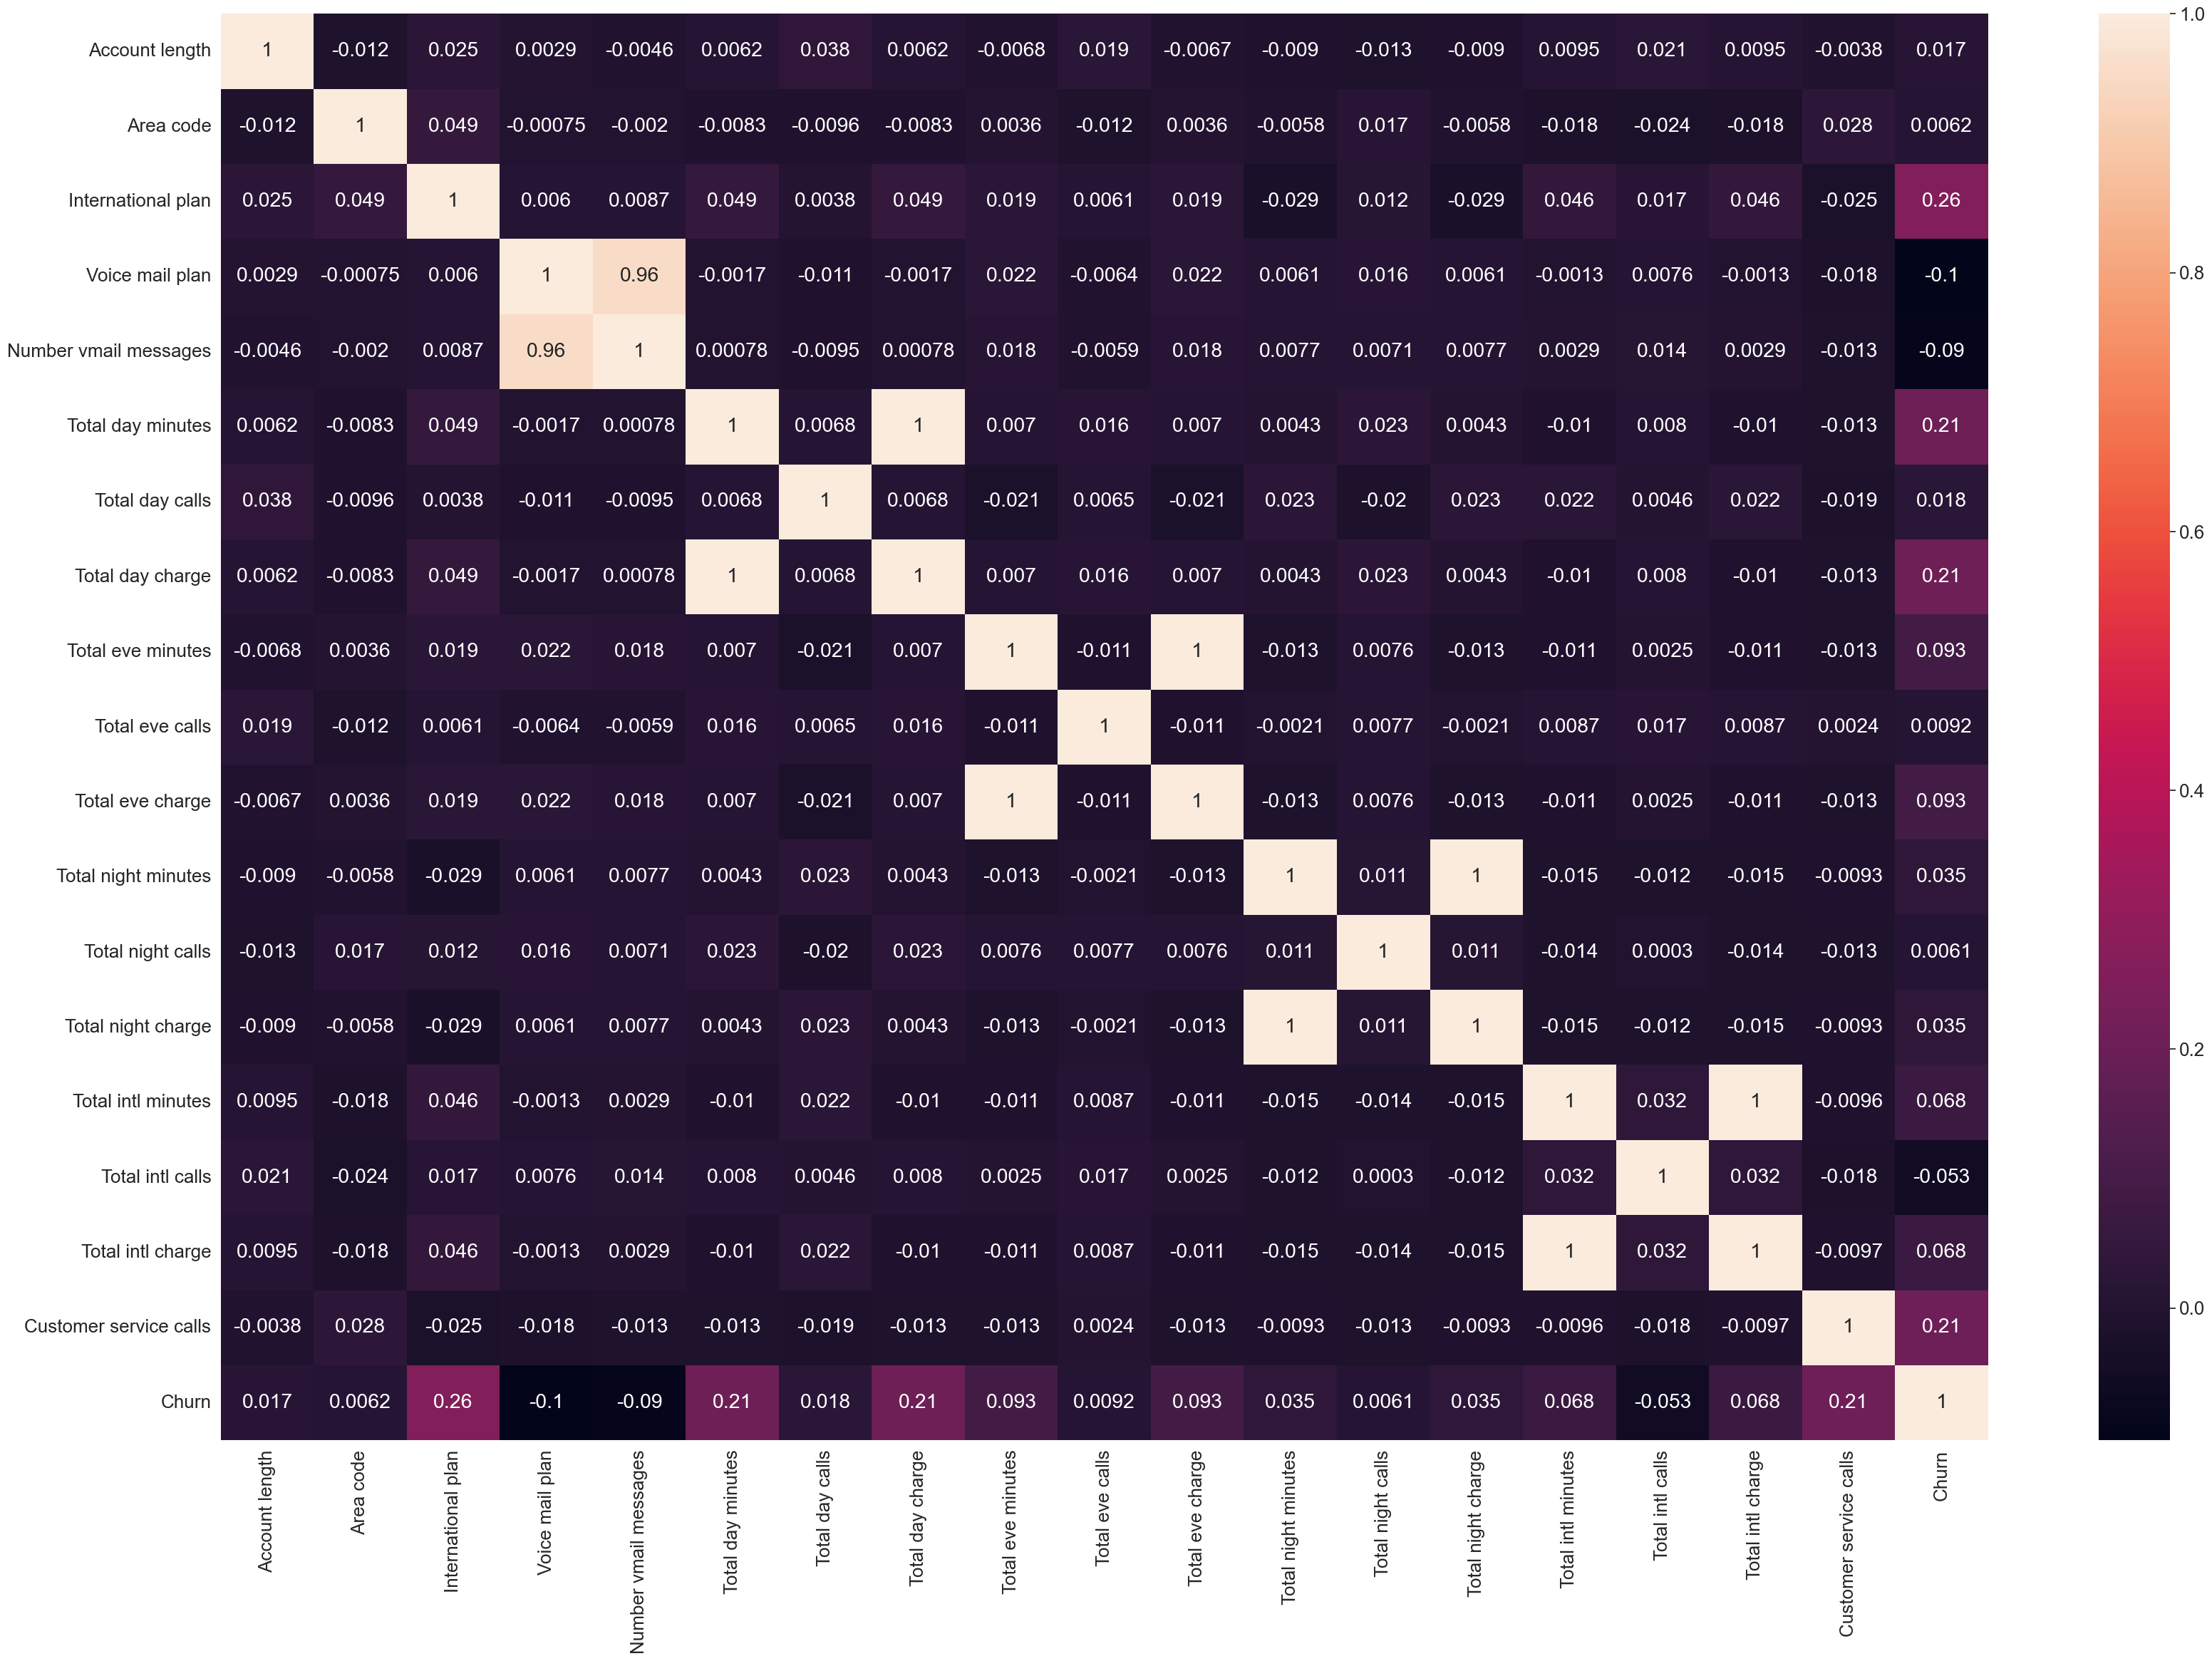

In [36]:
correlation_matrix = df.corr()
plt.figure(figsize= (40, 26))
sns.heatmap(correlation_matrix, annot = True)

Видим, что некоторые признаки абсолютно коррелируют друг с другом

-----------------
Нами была использована модель RandomForestClassifier с гиперпараметрами "по умолчанию". Применим алгоритм GridSearchCV для нахождения оптимальных гиперпараметров в построении нашей модели. В качестве критерия выберем максимизацию показателя AUC (ROC)

In [37]:
from sklearn.model_selection import GridSearchCV
# Функция для оценки модели с помощью перекрестной проверки
def evaluate_model(model1, X_train, y_train):
    scores = cross_val_score(model1, X_train, y_train, scoring='roc_auc', cv=5)
    return scores.mean()

# Поиск гиперпараметров с помощью сетки параметров
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 9, 11],
    'min_samples_split': [2, 7, 10],
    'min_samples_leaf': [2, 5]
}

grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Лучшие гиперпараметры для модели (Grid Search): {grid_search.best_params_}")
print(f"Лучшая оценка для модели (Grid Search): {grid_search.best_score_:.2f}")

Лучшие гиперпараметры для модели (Grid Search): {'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Лучшая оценка для модели (Grid Search): 0.92


Применим найденные гиперпараметры в построении модели, применим сбалансированные по классам веса

In [38]:
model2 = RandomForestClassifier(n_estimators = 100, max_depth= 11, min_samples_split=7, min_samples_leaf=2)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       855
           1       0.93      0.72      0.81       145

    accuracy                           0.95      1000
   macro avg       0.94      0.85      0.89      1000
weighted avg       0.95      0.95      0.95      1000



Поиск гиперпараметров с помощью GridSearchCV не привел к существенному улучшению метрик качества модели

In [39]:
confusion_mat = confusion_matrix(y_test, y_pred2)
print("Точность:", accuracy_score(y_test, y_pred2))
print("Точность:", precision_score(y_test, y_pred2, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred2, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred2, average = 'binary'))

Точность: 0.951
Точность: 0.9285714285714286
Полнота: 0.7172413793103448
F1-мера: 0.8093385214007783


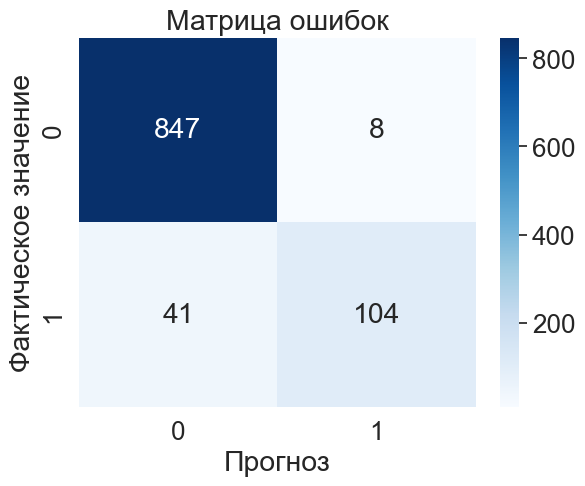

In [40]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

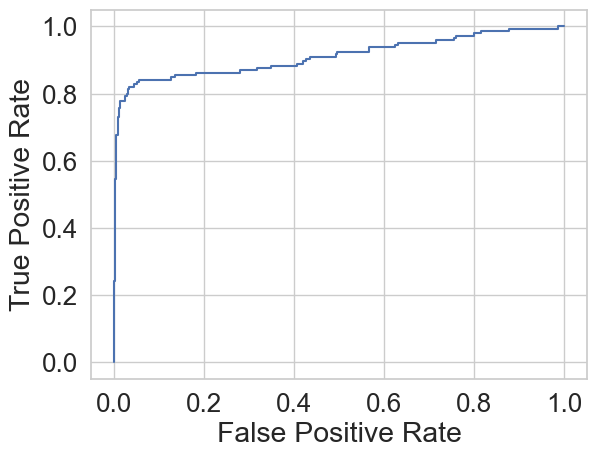

In [41]:
#Предсказываем вероятности
y_pred_proba2 = model2.predict_proba(X_test)[:, 1]
# Строим кривую ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba2)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
auc = metrics.roc_auc_score(y_test, y_pred_proba2)
print("AUC: %.3f" % auc)

AUC: 0.911


In [43]:
trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

**Кросс-валидация**

Оценим модель с найденными гиперпараметрами в случае однократного применения, при 5-кратной кросс-валидации, при 10-кратной кросс-валидации. За основу возьмем значение AUC (ROC).

In [44]:
# Однократная оценка на тестовых данных
single_score = metrics.roc_auc_score(y_test, y_pred_proba2)
print("Однократная оценка эффективности (accuracy):", single_score)

# 5-кратная кросс-валидация на всем датасете
cross_val_scores = cross_val_score(model2, X, y, cv=5, scoring='roc_auc')
print("Среднее значение accuracy по 5-кратной кросс-валидации:", cross_val_scores.mean())

scores_10 = cross_val_score(model2, X, y, cv=10, scoring='roc_auc')
print("Среднее значение accuracy при 10-кратной кросс-валидации:", scores_10.mean())

Однократная оценка эффективности (accuracy): 0.9109901189755999
Среднее значение accuracy по 5-кратной кросс-валидации: 0.9159650630011453
Среднее значение accuracy при 10-кратной кросс-валидации: 0.9147693638859054


При использовании кросс-валидации видим, что значение метрики (площадь под кривой ROC) не снижается, и немного растет, что свидетельствует о стабильности построенной нами модели и отсуствии переобучения при первичном построении.

**Применим Recursive Feature Elimination (RFE) для выбора количества признаков**

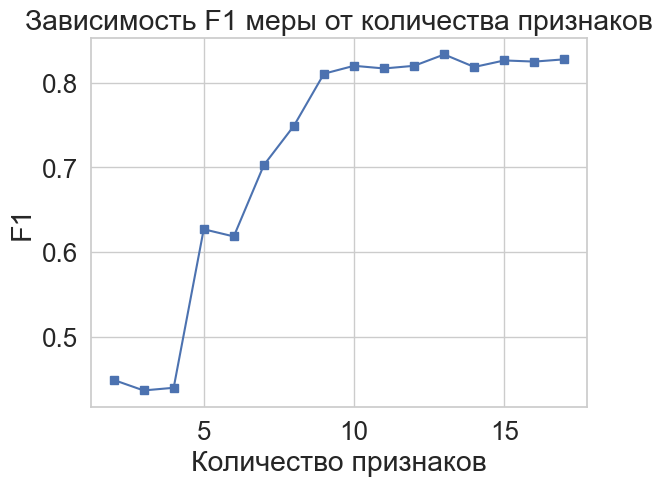

In [45]:
from sklearn.feature_selection import RFE

n_features = list(range(2, len(df.columns)-1))
metrics = []

model3 = RandomForestClassifier(random_state=42)

for k in n_features:
  rfe = RFE(model3, n_features_to_select=k)
  rfe = rfe.fit(X_train, y_train)
  X_train_rfe = rfe.transform(X_train)
  X_test_rfe = rfe.transform(X_test)
  model3.fit(X_train_rfe, y_train)
  y_pred3 = model3.predict(X_test_rfe)
  f1 = f1_score(y_test, y_pred3, average = 'binary')
  metrics.append(f1)



plt.plot(n_features, metrics, marker = 's')
plt.title('Зависимость F1 меры от количества признаков')
plt.xlabel('Количество признаков')
plt.ylabel('F1');
plt.show()

Видим, что оптимальным является 13 признаков в модели, достаточным - 9. После этого метрика растет незначительно

In [ ]:
model4 = RandomForestClassifier(random_state=42)
rfe = RFE(model4, n_features_to_select=9)
rfe = rfe.fit(X_train, y_train)

In [ ]:
# Показываем какие признаки выбраны
selected_features = pd.DataFrame({
    'Feature': X.columns,  # Здесь X.columns должен содержать названия столбцов, использованных для X
    'Ranking': rfe.ranking_
})
print(selected_features.sort_values(by='Ranking', ascending=False))

In [ ]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)
model4.fit(X_train_rfe, y_train)
y_pred4 = model4.predict(X_test_rfe)
print(classification_report(y_test, y_pred4))

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred4)
print("Точность:", accuracy_score(y_test, y_pred4))
print("Точность:", precision_score(y_test, y_pred4, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred4, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred4, average = 'binary'))

In [ ]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

*Видим, что при таком количестве признаков качество модели практически не ухудшилось*

В настоящей работе мы применили классификацию с помощью модели RandomForestClassifier "из коробки", попробовали улучшить метрики качества при помощи подбора гиперпараметров GridSearchCV - убедились, что в случае с RandomForestClassifier модель дает хорошие метрики даже с параметрами по умолчанию. С помощью кросс-валидации убедились в том, что модель не склонна к переобучению. С применением Recursive Feature Elimination нашли, что для модели достаточно оставить 9 из 17 признаков - качество модели от этого практически не ухудшается